# Ross Brown Springboard Data Science Project 7.2: Apply Data Storytelling


For those living in the greater latitudes of the northern hemisphere, the effects of winter can be concrete and disruptive. A basic human need – social interaction – can suffer when mobility is hampered by several feet of snow and subzero temperatures; city residents relying on public transit may prefer to spend their free time home and indoors rather than braving snow and slush that make transportation treacherous. Add shorter days and months without sunshine into the mix, and you've got the ingredients of a mood disorder with characteristics of depression that is associated with features of seasonal winter weather: seasonal affective disorder (SAD).

Like other depressive conditions, SAD has been associated with alcoholism, in both the [research literature]( https://www.ncbi.nlm.nih.gov/pubmed/14671737) and the [popular press]( http://www.businessinsider.com/people-with-seasonal-affective-disorder-are-more-likely-to-be-alcoholics-2017-10)

Winter severity varies from year to year, now more than before, due to global warming. Would winter severity be predictive of alcoholism, with SAD the vector, so to speak? 

Harsher  Winter  = Seasonal Affective Disorder is more widespread and/or more severe = More Alcoholism

Taking out the vector, More severe winter  = More alcoholism

If alcoholism could be predicted with weather data, its effects could be more readily mitigated. Providers of mental health care could be prepared in advance to offer treatment: For-profit providers could increase staff, and government providers could increase outreach programs to vulnerable populations. City health agencies could take steps to counter the effects SAD before alcoholism develops: providing transit and social activities targeted to those most likely to be affected. If winter severity has differential effects on subsets of the population, i.e., particular socioeconomic group, education level, etc., outreach could be more targeted.

Examining two datasets may help determine whether evidence supports the hypothesis that winter severity may lead to increases in alcoholism. The datasets are: A winter severity index and data on the number of people admitted to substance abuse treatment each year. A pilot study of these datasets in a delineated location will help isolate the possible relationship of the predictive variable, winter severity, on the outcome variable, alcoholism.

The feature is the [Accumulated Winter Season Severity Index](https://journals.ametsoc.org/doi/full/10.1175/JAMC-D-14-0217.1) (AWSSI), calculated by the National Oceanic and Atmospheric Administration and the National Weather Service, which quantifies winter severity. It uses “widely available daily meteorological parameters to quantify the severity of a winter season [and] is calculated with a temperature component and a snow component, allowing an end-of-season total AWSSI to represent the severity of a season” 

The target is the [Treatment Episode Data Set – Admissions](https://catalog.data.gov/dataset/treatment-episode-data-set-admissions-teds-a-2013) (TEDS-A), a national census data system of annual admissions to substance abuse treatment facilities that receive public funding. The annual dataset is available for the years from1992 to 2014. 

The weather stations for which there are AWSSI data include one in Blue Hill, Mass. It is the only station in that state, and is somewhat centrally located, at least in terms of state population distribution. For alcohol admissions, the TEDS-A data is sliced many different ways, but there is missing data for several of the geographic categories. Alcohol admissions data by state, however, is mostly complete, so the target will be alcohol admissions for Massachusetts from 1992 to 2014.



With only 23 data points, it's hard to generalize from a histogram of the target variable, but there were 10 years when Massachusetts saw between 30,000 and 34,999 patient admissions for alcoholism. The range on the low end of the histogram was greater than on the high end. 

In [1]:
import plotly
plotly.tools.set_credentials_file(username="Ross.Brown.Ph.D.", api_key='yPNZCAkYOyi7wAKtZrSM')
import pandas as pd
from pandas import DataFrame
df = pd.read_pickle("C:/Users/rmbrm/Documents/DS ED/2018/Spring/7.2 Assignment data storytelling/all_data", compression='infer')

df['YEAR'] = df.index


import plotly.offline as pyo

from plotly.graph_objs import *

import plotly.plotly as py

from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot


import plotly.graph_objs as go
import numpy as np

from plotly import tools
from plotly.graph_objs import Bar, Data, Figure, Layout, Marker, Scatter

init_notebook_mode(connected=True)

import cufflinks as cf

# Make a histogram of main target

dfa = df.drop(df.columns[0:36], axis =1)
fig1 = dfa.iplot(kind='histogram', color='#08519c', title='Histogram of Number of Alcoholism Admissions per Year', xTitle='Number of Admissions', yTitle='Number of Years', asFigure=True)
pyo.iplot(fig1)

A scatterplot matrix of the target and the feature and its components (AWSSI, temperature score, and snow score) showed a slightly negative relationship between features and the target. 

In [2]:
# Index related features
dfindex = df [['total_admits', 'AWSSI', 'TempScore', 'SnowScore']]
dfindex = dfindex.set_index(['total_admits'])
fig1 = dfindex.iplot(colors=['#08519c', '#3182bd', '#85929e'], kind='scatter', mode='markers', subplots=True, subplot_titles=True, shared_xaxes=True, title='Features: Winter Index and Temperature, Snow Components. Target: Total Alcoholism Admissions.',  xTitle='Number of Admissions', yTitle='Index', dimensions=(1116, 800), asFigure=True)
pyo.iplot(fig1)

More evidence of the feature/target relationship was apparent when feature line charts were combined with a target bar chart. One dip in admissions between 2001 and 2006 tracked moderately with a spike in winter severity for the years 2003 to 2005. A dip in winter severity for the years 2006 to 2008 coincided with an increase in admissions for those years.

In [11]:
df = df.set_index(['YEAR'], drop = False)
import cufflinks as cf
cf.set_config_file(offline=False, world_readable=True, theme='ggplot')
# Make bar chart of main target (Total admissions) overlayed with line charts of main Index related features


fig1 = df.iplot(columns=['total_admits'], colors=['#08519c'], kind='bar', gridcolor='#FFFFFF', asFigure=True)
fig2 = df.iplot(columns=['AWSSI', 'TempScore', 'SnowScore'], colors=['#34495e', '#85929e', '#ccd1d1'], width=[4, 3, 3], title='Features: Winter Severity Index & Components. Target: Total Alcoholism Admissions',  xTitle='Year', yTitle='Admissions', secondary_y=['AWSSI','TempScore', 'SnowScore'], gridcolor='#FFFFFF', asFigure=True)
fig2['data'].extend(fig1['data'])
fig2['layout'].update(titlefont=dict(
            family='Verdana',
            size=15,
            color='#7f7f7f'
            ),
            paper_bgcolor='#FFFFFF', plot_bgcolor='#FFFFFF')
pyo.iplot(fig2)

Replacing the main target bars on these charts with stacked bars showing the components of the demographic classifications (i.e., female stacked on male, black stacked on white), there was no evidence of differential winter effects for different subgroups. Instead, changes in the demographic breakdowns over years were likely the result of other, independent trends affecting the overall population. For example, the percent of people admitted for alcoholism who were unemployed grew markedly after 2007, no doubt due to the increases in unemployment in the overall population during the Great Recession.

In [12]:
# Make stacked bar charts of main demographic subgroups of target, overlaid with a line chart of feature and components

fig1 = df.iplot(columns=['male', 'female'], colors=['#08519c', '#3182bd'], kind='bar', gridcolor='#FFFFFF', asFigure=True)
fig2 = df.iplot(columns=['TempScore', 'SnowScore', 'AWSSI'], colors=['#85929e', '#ccd1d1', '#34495e'], width=[3, 3, 4], title='Winter Severity Index and Alcoholism Admissions by Gender',  xTitle='Year', yTitle='Admissions', secondary_y=['TempScore', 'SnowScore', 'AWSSI'], gridcolor='#FFFFFF', asFigure=True)
fig2['data'].extend(fig1['data'])
fig2['layout'].update(barmode='stack', titlefont=dict(
            family='Verdana',
            size=15,
            color='#7f7f7f'
            ),
            paper_bgcolor='#FFFFFF', plot_bgcolor='#FFFFFF')
pyo.iplot(fig2)

In [13]:
fig1 = df.iplot(columns=['white', 'black'], colors=['#08519c', '#3182bd'], kind='bar', gridcolor='#FFFFFF', asFigure=True)
fig2 = df.iplot(columns=['TempScore', 'SnowScore', 'AWSSI'], colors=['#85929e', '#ccd1d1', '#34495e'], width=[3, 3, 4], title='Winter Severity Index and Alcoholism Admissions by Race',  xTitle='Year', yTitle='Admissions', secondary_y=['TempScore', 'SnowScore', 'AWSSI'], gridcolor='#FFFFFF', asFigure=True)
fig2['data'].extend(fig1['data'])
fig2['layout'].update(barmode='stack', titlefont=dict(
            family='Verdana',
            size=15,
            color='#7f7f7f'
            ),
            paper_bgcolor='#FFFFFF', plot_bgcolor='#FFFFFF')
pyo.iplot(fig2)

In [14]:
fig1 = df.iplot(columns=['not_in_wrkfrc', 'unemployed', 'part_time', 'full_time'], colors=['#08519c', '#3182bd', '#6baed6', '#9ecae1'], kind='bar', gridcolor='#FFFFFF', asFigure=True)
fig2 = df.iplot(columns=['TempScore', 'SnowScore', 'AWSSI'], colors=['#85929e', '#ccd1d1', '#34495e'], width=[3, 3, 4], title='Winter Severity Index and Alcoholism Admissions by Employment Status',  xTitle='Year', yTitle='Admissions', secondary_y=['TempScore', 'SnowScore', 'AWSSI'], gridcolor='#FFFFFF', asFigure=True)
fig2['data'].extend(fig1['data'])
fig2['layout'].update(barmode='stack', titlefont=dict(
            family='Verdana',
            size=15,
            color='#7f7f7f'
            ),
            paper_bgcolor='#FFFFFF', plot_bgcolor='#FFFFFF')
pyo.iplot(fig2)

A heatmap of the correlations between features and target showed more evidence supporting the null hypothesis (winter severity is not positively related to winter severity). The heatmap showed:

1.	Overall there are systematic negative correlations between the winter severity index (and its components) and the number of people admitted for alcoholism treatment.
2.	There are only two positive correlations, and they are so small as to be meaningless (.04 was the largest). 
3.	Additionally, in terms of correlation size and direction, subgroups with the smallest counts were outliers from the other correlations.


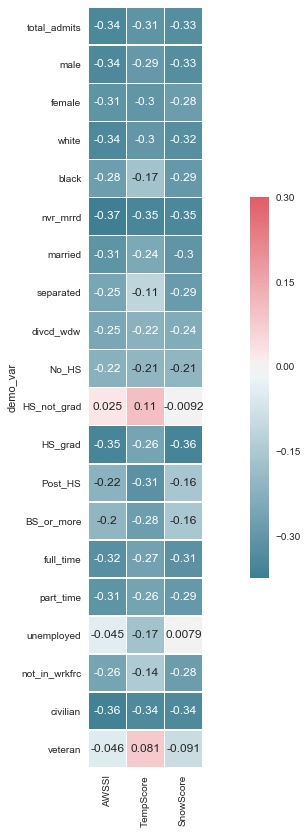

In [16]:
# Make a heatmap of all target subgroups and features
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("C:/Users/rmbrm/Documents/DS ED/2018/Spring/7.2 Assignment data storytelling/cr.csv", header=(0))
dfb = df.set_index(['demo_var'])
sns.set(style="white")
f, ax = plt.subplots(figsize=(17, 14))
# sns.heatmap(dfb, annot=True, cmap='PuOr')
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(dfb, annot=True, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()
plt.show()

Findings 2 and 3, as well as the small counts for some subgroups, lead me to combine smaller subgroups into fewer, larger subgroups, and rerun the correlations. I made the following changes to the target variables. 
* I deleted the veteran and civilian variables, since it had missing data, and most admissions were not veterans.
* For education, five subgroups were reduced to three: those without high school degrees, those with high school degrees, and those with any amount of college education.
* For employment status, four groups were combined into two: those working (part-time or full-time), and those not working (unemployed or not in the workforce).
* Four marital status groups were combined into two: those who were never married, and those who were currently or formerly married.


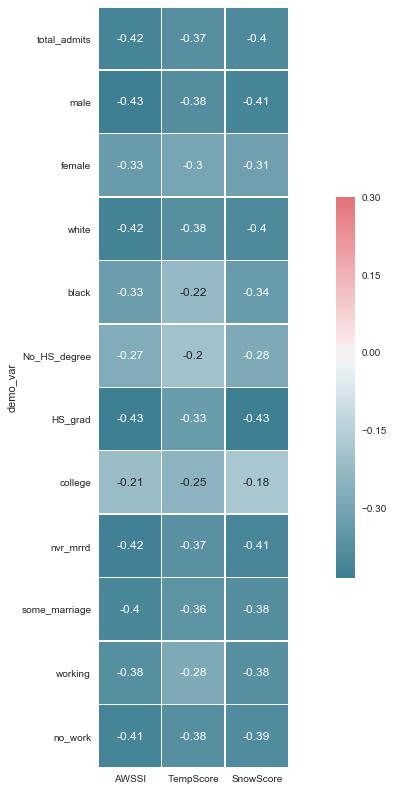

In [18]:
# Create heatmap of big var correlation matrix

dfd = pd.read_csv("C:/Users/rmbrm/Documents/DS ED/2018/Spring/7.2 Assignment data storytelling/big_cr.csv", header=(0))
dfe = dfd.set_index(['demo_var'])
sns.set(style="white")
f, ax = plt.subplots(figsize=(17, 14))
# sns.heatmap(dfb, annot=True, cmap='PuOr')
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(dfe, annot=True, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()
plt.show()

The size of the negative correlations between the features and the target variables increased when the demographic subgroups were consolidated. The average increases of the negative correlations are listed below:

AWSSI	:	0.05
Temp Score:	0.04
Snow Score:	0.05


The data that suggested a revised, opposite hypothesis was piling up. Based on exploratory data analysis, the hypothesis should be revised: *MILDER* winter weather may be predictive of demand for treatment of alcoholism.